In [1]:
import pathlib
import pandas as pd
import seaborn as sns
from matplotlib.colors import rgb2hex
from mpl_toolkits.mplot3d import axes3d, Axes3D

import analysisutils as utils

In [2]:
norm_data_path = pathlib.Path("../4_processing_features/data/nf1_sc_norm_fs_cellprofiler.csv.gz")
norm_data = pd.read_csv(norm_data_path, compression="gzip", index_col=0)

metadata_dataframe, feature_data = utils.split_data(norm_data)
genotypes = metadata_dataframe["Metadata_genotype"]
well = metadata_dataframe["Metadata_Well"]
well_num = metadata_dataframe["Metadata_WellCol"]

norm_data

,Metadata_WellCol,Metadata_gene_name,Metadata_genotype,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_OrigNuclei,Metadata_Cells_Number_Object_Number,Metadata_Nuclei_Number_Object_Number,...,Nuclei_Texture_InfoMeas1_RFP_3_03_256,Nuclei_Texture_InfoMeas2_GFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_01_256,Nuclei_Texture_InfoMeas2_RFP_3_02_256,Nuclei_Texture_InfoMeas2_RFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_GFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_00_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_03_256,Nuclei_Texture_SumVariance_RFP_3_01_256
Metadata_WellRow,,,,,,,,,,,,,,,,,,,,,
C,6,NF1,WT,1,1,C6,1,4,1,4,...,-1.197488,0.289091,0.969456,1.131385,1.303680,1.416917,-0.079438,-2.315521,-1.693210,2.881199
C,6,NF1,WT,1,1,C6,2,5,2,5,...,0.188414,0.611666,0.481954,0.748184,0.750277,0.511083,-0.065958,-1.460076,-1.427579,0.304121
C,6,NF1,WT,1,1,C6,3,7,3,7,...,-1.087258,0.843883,-0.214887,0.238299,0.482832,1.264950,-0.069749,-1.841707,-0.798368,0.257284
C,6,NF1,WT,1,1,C6,4,8,4,8,...,-1.250742,0.638684,1.163023,1.062039,1.082605,1.386850,-0.272864,-1.789888,-1.432404,1.083761
C,6,NF1,WT,4,1,C6,1,3,1,3,...,-0.258815,-2.222128,-0.048779,0.504843,1.340830,0.924382,0.612704,-2.158178,-1.781201,0.518641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F,7,NF1,Null,32,1,F7,8,12,8,12,...,-0.730713,-3.721664,0.344692,0.526792,0.444591,0.664847,1.259085,0.745004,0.968347,-0.322389
F,7,NF1,Null,32,1,F7,9,13,9,13,...,0.925737,-1.410478,0.047610,-0.030179,-0.897448,-1.032699,0.849219,0.627234,0.096817,-0.326481
F,7,NF1,Null,32,1,F7,10,14,10,14,...,1.010381,-1.976427,-1.631117,-0.338652,-0.706971,-1.383757,0.484107,0.874705,0.836486,-0.367298


In [3]:
point_size = 25
alpha = 0.6
# look into changing later
color_palette = "bright"

save_dir = pathlib.Path("UMAPS/")
save_dir.mkdir(exist_ok=True, parents=True)

In [4]:
norm_data["Metadata_genotype"].unique().tolist()

['WT', 'Null']

In [5]:
classes = [
    "WT",
    "Null",
]

class_colors = utils.get_class_colors(classes, "rainbow")

class_colors

{'WT': '#2adddd', 'Null': '#d4dd80'}

## UMAPs using genotype as metadata

In [6]:
umap_1D_save_path = pathlib.Path(f"{save_dir}/norm_nf1_1D_umap.png")

utils.show_1D_umap(feature_data, genotypes, class_colors, save_path=umap_1D_save_path, point_size=point_size, alpha=alpha, show_plot=False)

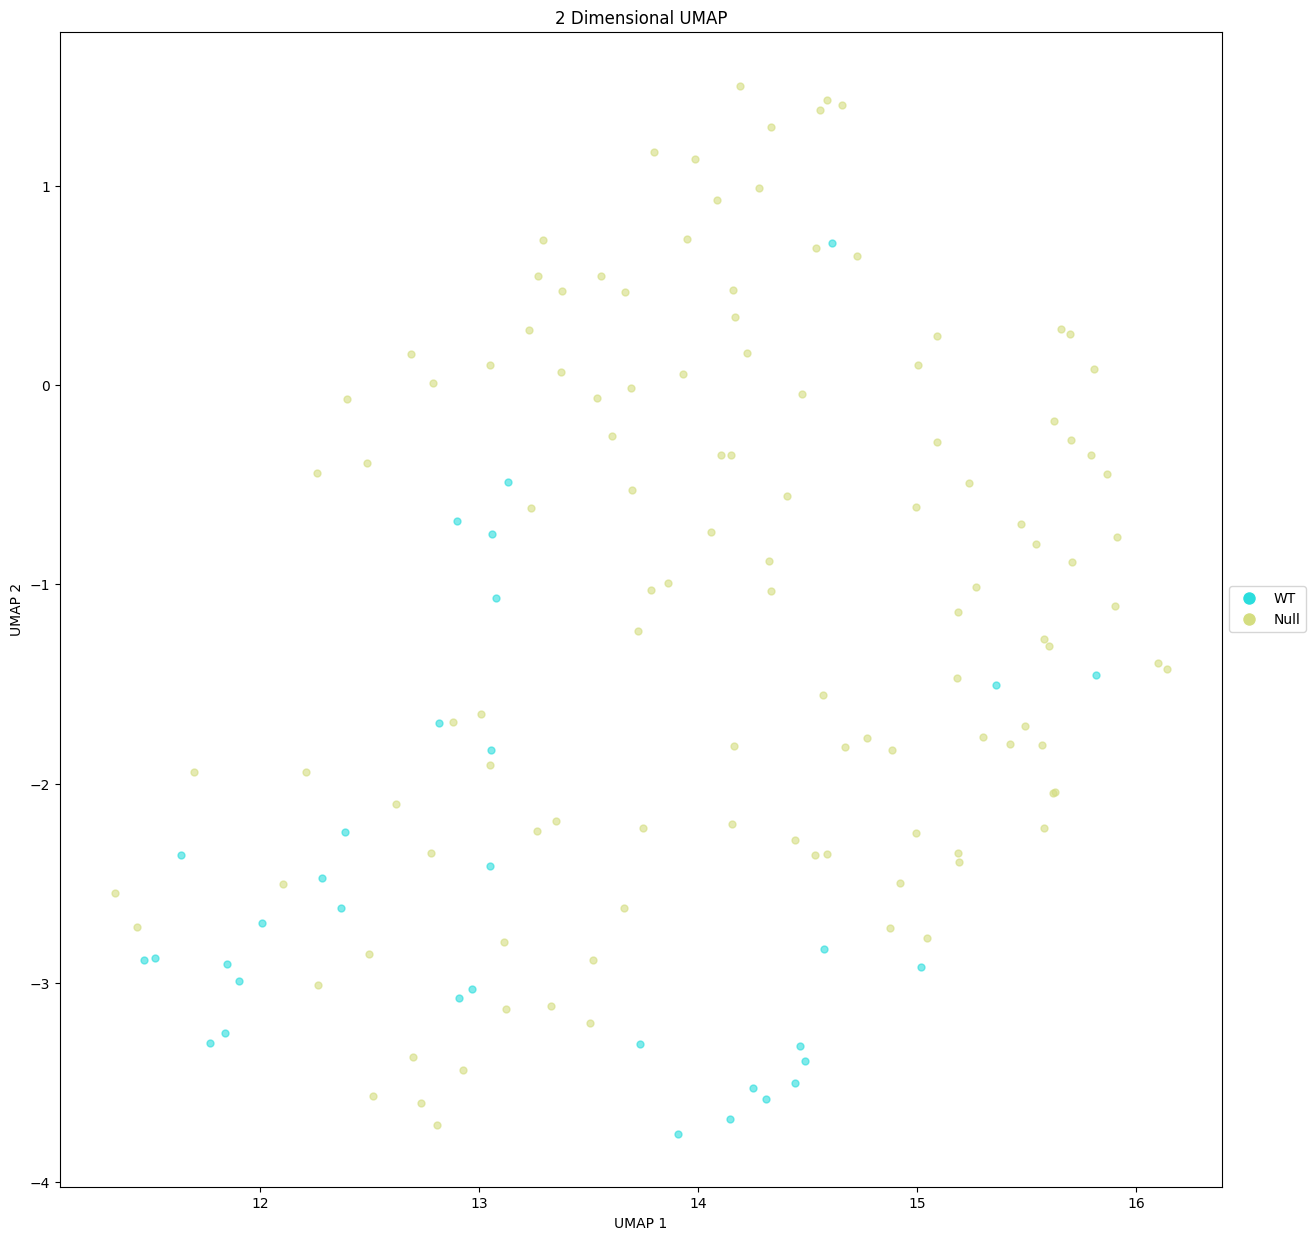

In [7]:
umap_2D_save_path = pathlib.Path(f"{save_dir}/norm_nf1_2D_umap.png")
utils.show_2D_umap(feature_data, genotypes, class_colors, save_path=umap_2D_save_path, point_size=point_size, alpha=alpha)


In [8]:
umap_3D_save_path = pathlib.Path(f"{save_dir}/norm_nf1_3D_umap.png")
utils.show_3D_umap(feature_data, genotypes, class_colors, save_path=umap_3D_save_path, point_size=point_size, alpha=alpha, show_plot=False)

## 2D UMAP using well as metadata

In [9]:
norm_data["Metadata_Well"].unique().tolist()

['C6', 'C7', 'D6', 'D7', 'E6', 'E7', 'F6', 'F7']

In [10]:
classes = [
    "C6",
    "C7",
    "D6",
    "D7",
    "E6",
    "E7",
    "F6",
    "F7",
]

class_colors = utils.get_class_colors(classes, "rainbow")

class_colors

{'C6': '#4856fb',
 'C7': '#10a2f0',
 'D6': '#2adddd',
 'D7': '#62fbc4',
 'E6': '#9cfba4',
 'E7': '#d4dd80',
 'F6': '#ffa256',
 'F7': '#ff562c'}

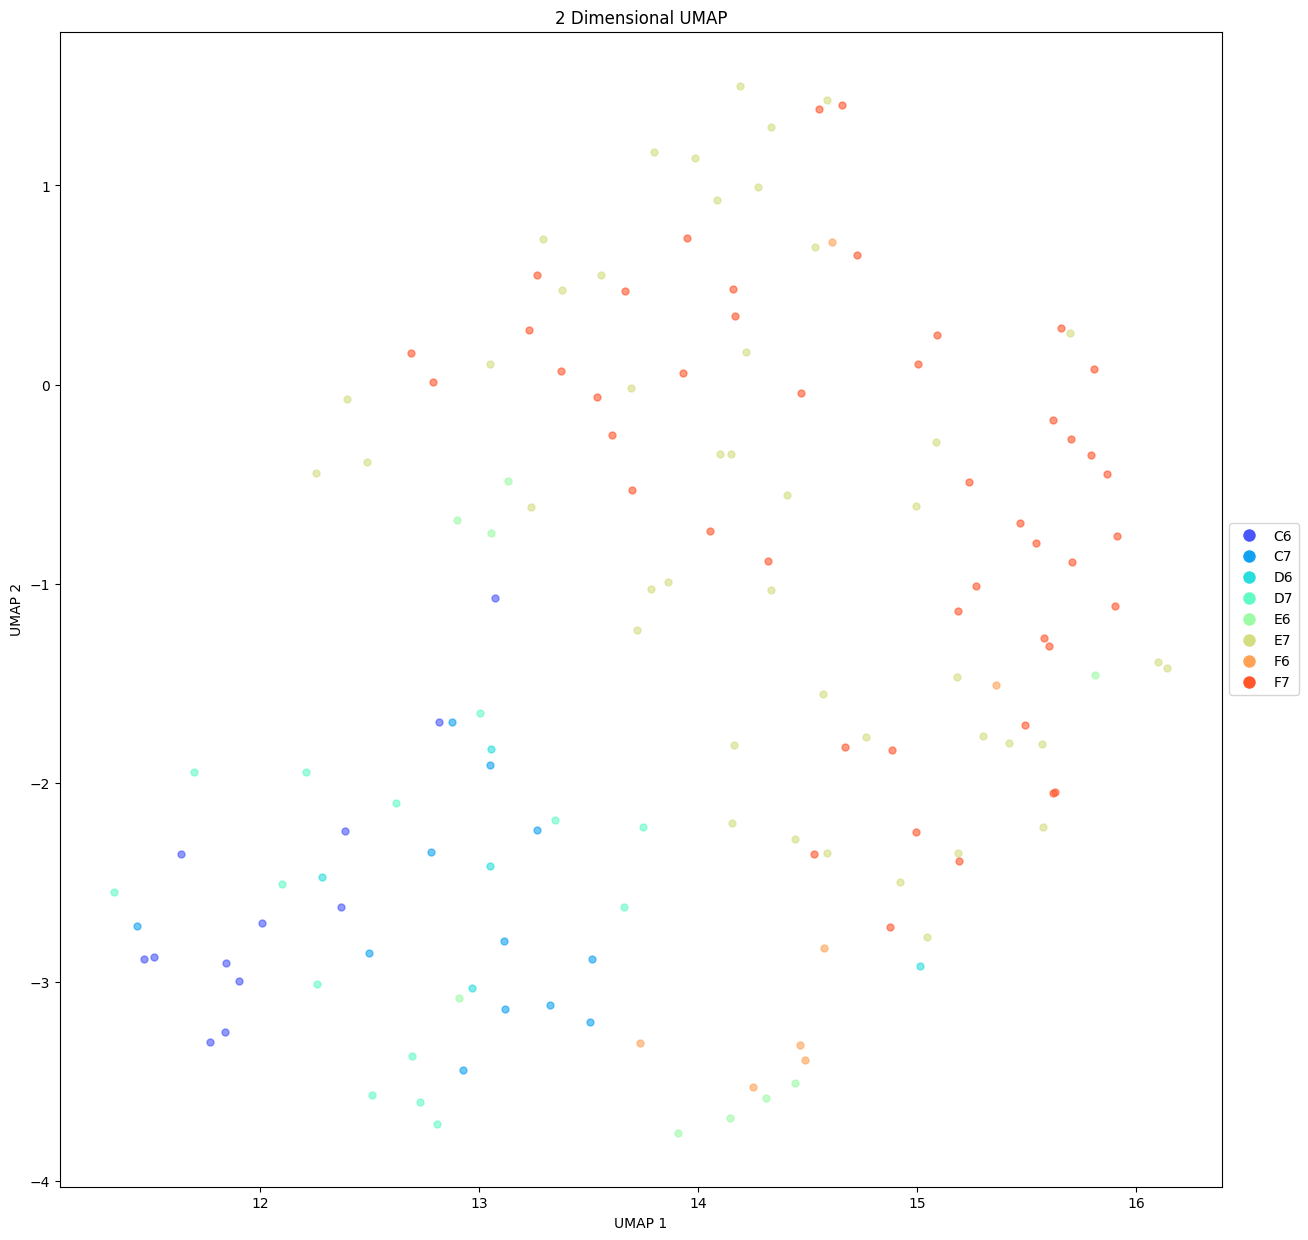

In [11]:
utils.show_2D_umap(feature_data, well, class_colors, save_path=umap_2D_save_path, point_size=point_size, alpha=alpha)

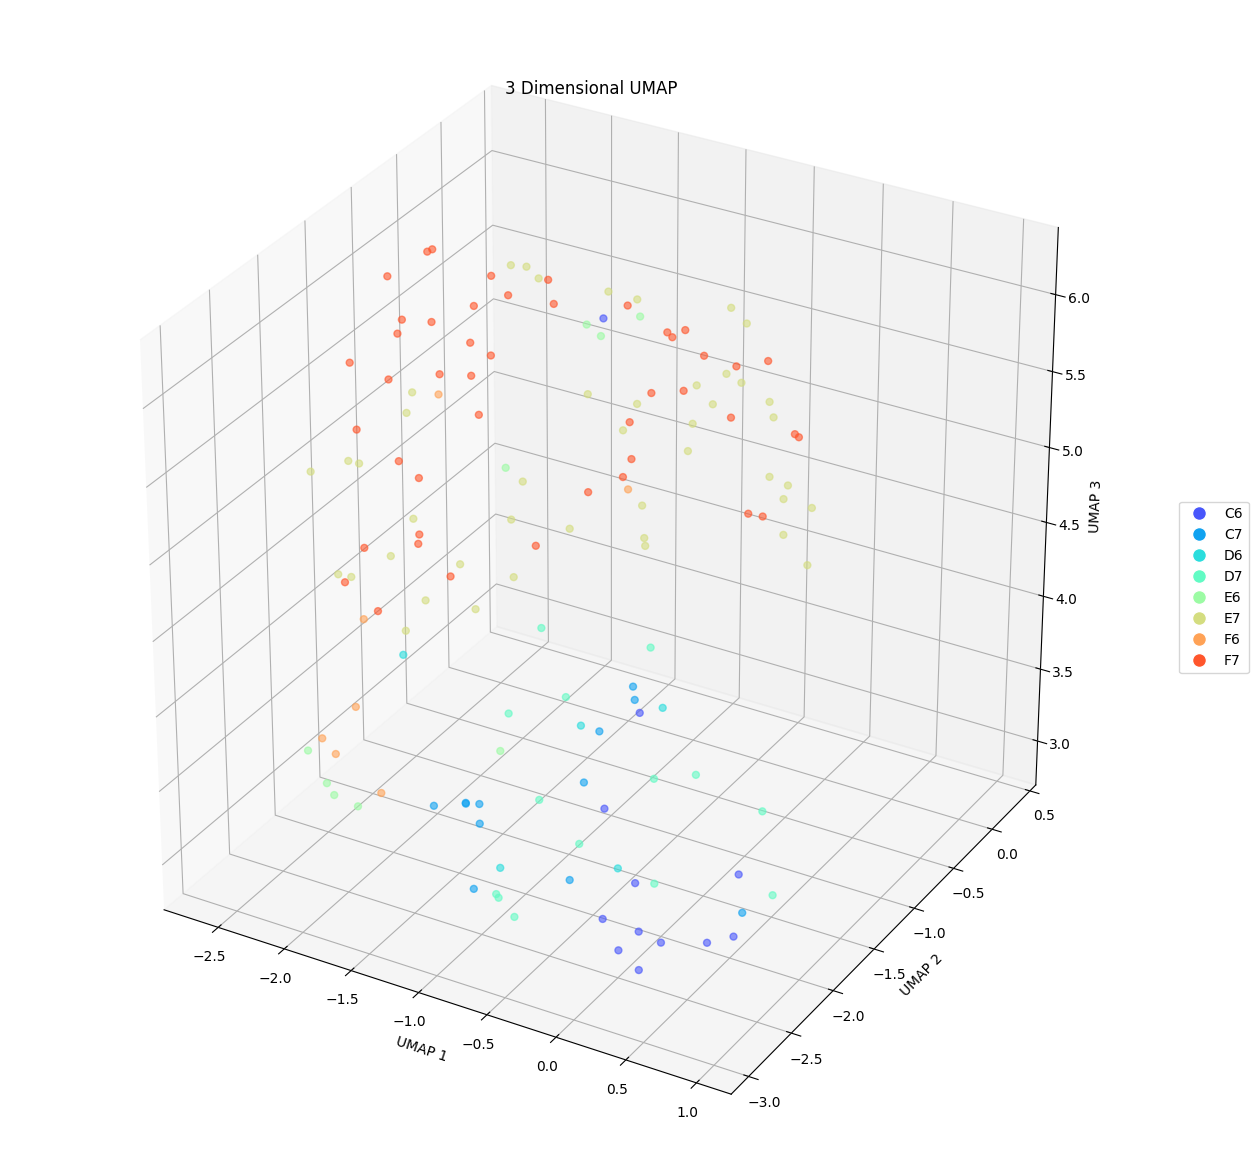

In [12]:
utils.show_3D_umap(feature_data, well, class_colors, save_path=umap_3D_save_path, point_size=point_size, alpha=alpha)

In [13]:
norm_data["Metadata_WellCol"].unique().tolist()

[6, 7]

In [14]:
classes = [
    6,
    7,
]

class_colors = utils.get_class_colors(classes, "rainbow")

class_colors

{6: '#2adddd', 7: '#d4dd80'}

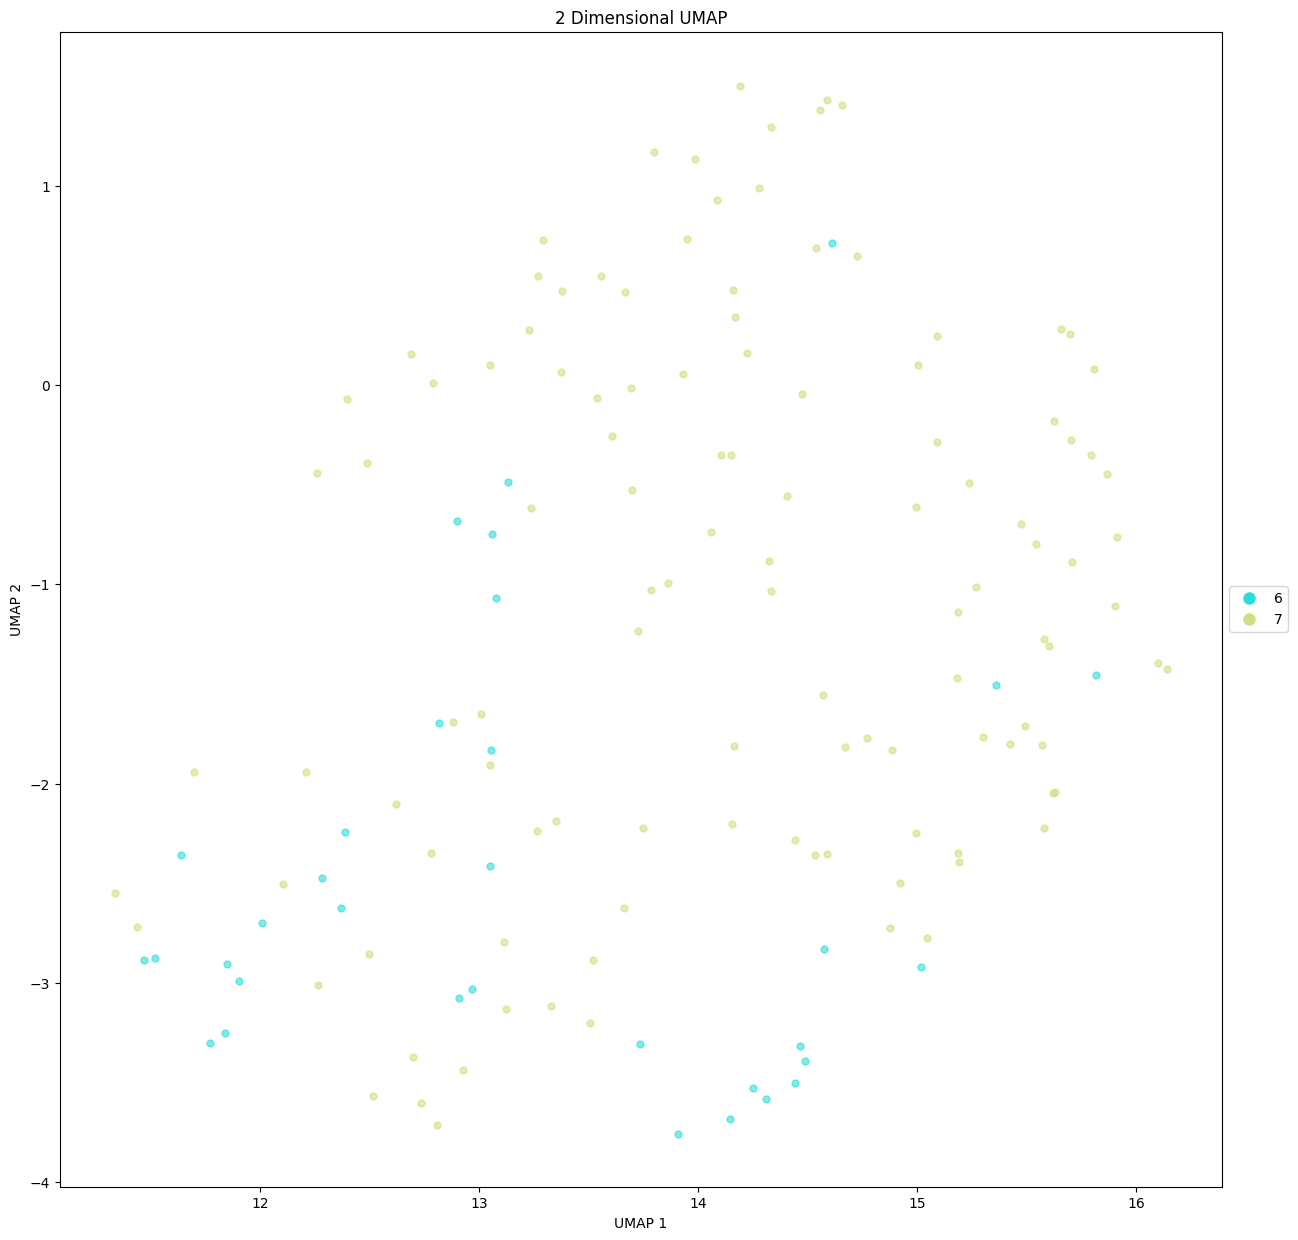

In [15]:
utils.show_2D_umap(feature_data, well_num, class_colors, save_path=umap_2D_save_path, point_size=point_size, alpha=alpha)

In [16]:
embeddings = utils.get_2D_umap_embeddings(feature_data)
embeddings

,UMAP1,UMAP2
0,11.638459,-2.359264
1,11.901725,-2.993272
2,11.517516,-2.876570
3,11.468371,-2.884644
4,12.816878,-1.696046
...,...,...
144,14.656168,1.404544
145,14.670760,-1.818202
146,15.191056,-2.393243
147,14.885182,-1.832831


In [17]:
save_path = pathlib.Path('data/norm_fs_embeddings.csv')

norm_fs_embeddings_data = utils.merge_metadata_embeddings(metadata_dataframe, embeddings, save_path)
norm_fs_embeddings_data

,Metadata_WellRow,Metadata_WellCol,Metadata_gene_name,Metadata_genotype,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_OrigNuclei,Metadata_Cells_Number_Object_Number,Metadata_Nuclei_Number_Object_Number,UMAP1,UMAP2
0,C,6,NF1,WT,1,1,C6,1,4,1,4,11.638459,-2.359264
1,C,6,NF1,WT,1,1,C6,2,5,2,5,11.901725,-2.993272
2,C,6,NF1,WT,1,1,C6,3,7,3,7,11.517516,-2.876570
3,C,6,NF1,WT,1,1,C6,4,8,4,8,11.468371,-2.884644
4,C,6,NF1,WT,4,1,C6,1,3,1,3,12.816878,-1.696046
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,F,7,NF1,Null,32,1,F7,8,12,8,12,14.656168,1.404544
145,F,7,NF1,Null,32,1,F7,9,13,9,13,14.670760,-1.818202
146,F,7,NF1,Null,32,1,F7,10,14,10,14,15.191056,-2.393243
147,F,7,NF1,Null,32,1,F7,11,16,11,16,14.885182,-1.832831
